In [5]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)



In [8]:
wordEmbedding = model['hello']

KeyedVectors<vector_size=300, 3000000 keys>
[-0.05419922  0.01708984 -0.00527954  0.33203125 -0.25       -0.01397705
 -0.15039062 -0.265625    0.01647949  0.3828125  -0.03295898 -0.09716797
 -0.16308594 -0.04443359  0.00946045  0.18457031  0.03637695  0.16601562
  0.36328125 -0.25585938  0.375       0.171875    0.21386719 -0.19921875
  0.13085938 -0.07275391 -0.02819824  0.11621094  0.15332031  0.09082031
  0.06787109 -0.0300293  -0.16894531 -0.20800781 -0.03710938 -0.22753906
  0.26367188  0.012146    0.18359375  0.31054688 -0.10791016 -0.19140625
  0.21582031  0.13183594 -0.03515625  0.18554688 -0.30859375  0.04785156
 -0.10986328  0.14355469 -0.43554688 -0.0378418   0.10839844  0.140625
 -0.10595703  0.26171875 -0.17089844  0.39453125  0.12597656 -0.27734375
 -0.28125     0.14746094 -0.20996094  0.02355957  0.18457031  0.00445557
 -0.27929688 -0.03637695 -0.29296875  0.19628906  0.20703125  0.2890625
 -0.20507812  0.06787109 -0.43164062 -0.10986328 -0.2578125  -0.02331543
  0.113281

In [9]:
import numpy as np
import pandas as pd

def readGloveVecs(gloveFile):
    with open(gloveFile, 'r') as f:
        words = []
        wordToVecMap = {}

        for line in f:
            line = line.strip().split()
            currWord = line[0]
            words.append(currWord)
            wordToVecMap[currWord] = np.array(line[1:], dtype=np.float64)

    return words, wordToVecMap



In [10]:
words, wordToVecMap = readGloveVecs('glove.6B.50d.txt')
len(words)

400000

In [11]:
pd.DataFrame(wordToVecMap).head()

,the,",",.,of,to,and,in,a,"""",'s,...,sigarms,katuna,aqm,1.3775,corythosaurus,chanty,kronik,rolonda,zsombor,sandberger
0,0.41800,0.013441,0.15164,0.70853,0.680470,0.268180,0.330420,0.21705,0.25769,0.23727,...,-0.743970,-0.30016,-1.11670,-0.24171,-0.042672,0.232040,-0.60921,-0.511810,-0.75898,0.072617
1,0.24968,0.236820,0.30177,0.57088,-0.039263,0.143460,0.249950,0.46515,0.45629,0.40478,...,0.082164,-0.80268,0.14057,-0.23367,-0.088106,0.025672,-0.67218,0.058706,-0.47426,-0.513930
2,-0.41242,-0.168990,-0.16763,-0.47160,0.301860,-0.278770,-0.608740,-0.46757,-0.76974,-0.20547,...,-0.009147,-0.46637,0.36302,0.10672,-0.317240,-0.706990,0.23521,1.091300,0.47370,0.472800
3,0.12170,0.409510,0.17684,0.18048,-0.177920,0.016257,0.109230,0.10082,-0.37679,0.58805,...,0.412900,-0.29822,-0.13836,-1.60230,-0.252090,-0.045465,-0.11195,-0.551630,0.77250,-0.522020
4,0.34527,0.638120,0.31719,0.54449,0.429620,0.113840,0.036372,1.01350,0.59272,0.65533,...,-0.422550,-1.03200,-1.47970,0.12440,-0.268510,0.139890,-0.46094,-0.102490,-0.78064,-0.355340


In [12]:
print("Number of words:", len(words))
print('5 word examples: ', words[1000:1005])
print('Dimension of word embedding: ', len(wordToVecMap), len(wordToVecMap['hello']))

Number of words: 400000
5 word examples:  ['themselves', 'firm', 'injured', 'itself', 'governor']
Dimension of word embedding:  400000 50


In [24]:
from sklearn.metrics.pairwise import cosine_similarity

father = wordToVecMap["father"].reshape(1,-1)
mother = wordToVecMap["mother"].reshape(1,-1)
ma = wordToVecMap["ma"].reshape(1,-1)
ball = wordToVecMap["ball"].reshape(1,-1)
president = wordToVecMap["president"].reshape(1,-1)
queen = wordToVecMap["queen"].reshape(1,-1)
king = wordToVecMap["king"].reshape(1,-1)
girl = wordToVecMap["girl"].reshape(1,-1)
boy = wordToVecMap["boy"].reshape(1,-1)
stop = wordToVecMap["stop"].reshape(1,-1)
dot = wordToVecMap["."].reshape(1,-1)
paris = wordToVecMap["paris"].reshape(1, -1)
france = wordToVecMap["france"].reshape(1, -1)
tokyo = wordToVecMap["tokyo"].reshape(1, -1)
japan = wordToVecMap["japan"].reshape(1, -1)
samurai = wordToVecMap["samurai"].reshape(1, -1)
katana = wordToVecMap["katana"].reshape(1, -1)

print(cosine_similarity(father, mother))
print(cosine_similarity(ma, mother))
print(cosine_similarity(queen, king))
print(cosine_similarity(stop, dot))
print(cosine_similarity(ball, president))
print(cosine_similarity(japan-tokyo, france-paris))
print(cosine_similarity(tokyo, paris))
print(cosine_similarity(tokyo, japan))
print(cosine_similarity(tokyo, samurai))
print(cosine_similarity(samurai, katana))

[[0.89090384]]
[[0.34420549]]
[[0.7839043]]
[[0.68090111]]
[[0.20942503]]
[[0.76782256]]
[[0.46484511]]
[[0.80787197]]
[[0.25121314]]
[[0.42853872]]


In [36]:
wordsToViz = ['president', 'obama', 'trump', 'minister', 'power', 'goverment', 'law',
 'apple', 'banana', 'pasta', 'pizza', 'burger', 'food', 'snack', 'meal', 'dinner',
 'france', 'paris', 'japan', 'tokyo', 'rome', 'italy', 'country', 'city',
 'man', 'woman', 'girl', 'boy', 'daughter', 'son', 'father', 'mother',
 'school', 'college', 'university', 'homework', 'student', 'scholarship',
 'company', 'work', 'employee', 'boss', 'hire', 'salary', 'startup', 'childcare', 'nurse', 'doctor', 'surgeon', 'engineer']

embedToViz = np.zeros((len(wordsToViz), 50))

for i, w in enumerate(wordsToViz):
    embedToViz[i] = wordToVecMap[w]
print(embedToViz)

[[-0.11875    0.6722     0.19444   ...  0.33674   -0.31224    0.097583 ]
 [ 0.088383   0.64673    1.1358    ...  0.61634   -0.029942   0.78279  ]
 [ 0.45769    0.85191    0.31098   ... -0.74226    0.77053    0.26394  ]
 ...
 [ 0.66999    0.11698   -0.46322   ... -0.089993   0.37778    0.59818  ]
 [ 0.31462    0.0044402 -0.80809   ... -0.33605   -0.52644    1.4079   ]
 [-0.33544   -0.35016    0.80945   ... -0.29683    0.072698   0.67634  ]]


[]

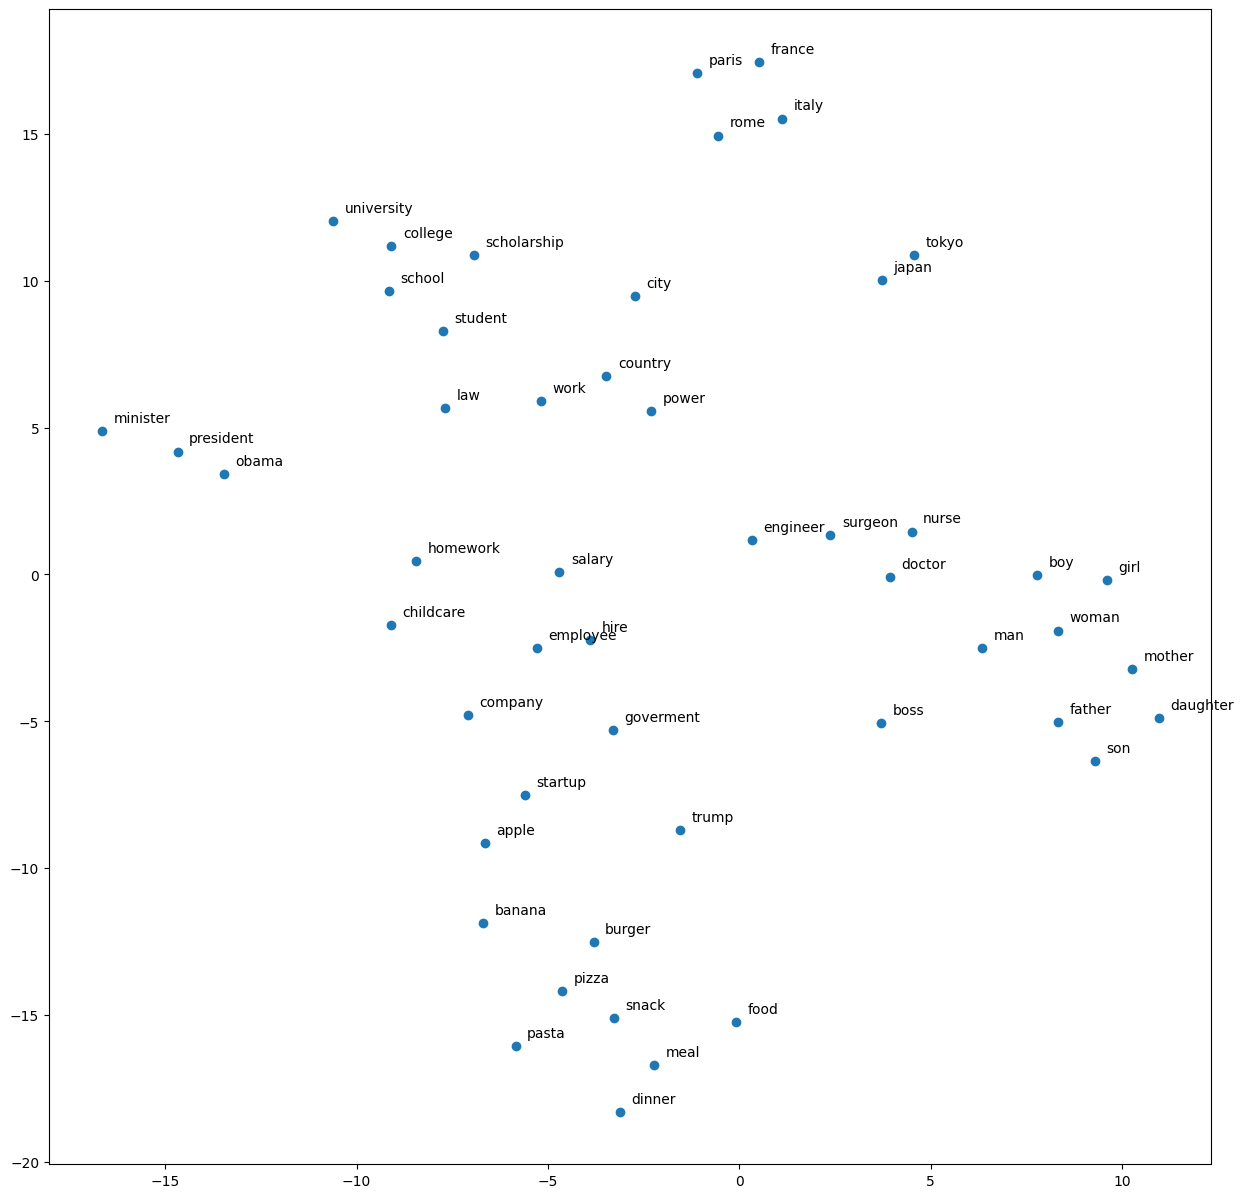

In [37]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=10)
viz = tsne.fit_transform(embedToViz)

plt.figure(figsize=(15,15))
for i, w in enumerate(wordsToViz):
    plt.annotate(xy=(viz[i,0], viz[i,1]), xytext=(viz[i,0]+0.3, viz[i,1]+0.3), text=w)
plt.scatter(viz[:,0], viz[:,1])
plt.plot()